In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import math
import sys
import os
sys.path.insert(0, os.getcwd().rsplit('/',1)[0])

import loops_utils
from loops_utils import LoopChromosomeContainer

In [2]:
%matplotlib inline

In [3]:
loops_info = pandas.read_excel('dicty_loop_positions_Chr1_Chr5_Chr6.xlsx')
loops_info['x'] = loops_info['x'].apply(lambda x: int(x - 1))
loops_info['y'] = loops_info['y'].apply(lambda x: int(x - 1))

## Scaling
### Calculate mean contact above the distance between bins n raw data

In [4]:
arr1 = np.load('arrs/2kb_chr'+str(1)+'.npy')
arr5 = np.load('arrs/2kb_chr'+str(5)+'.npy')
arr6 = np.load('arrs/2kb_chr'+str(6)+'.npy')

loops_info_chr1 = loops_info[loops_info.chr == 1]
loops_info_chr5 = loops_info[loops_info.chr == 5]
loops_info_chr6 = loops_info[loops_info.chr == 6]

container1 = LoopChromosomeContainer(arr1, loops_info_chr1)
container5 = LoopChromosomeContainer(arr5, loops_info_chr5)
container6 = LoopChromosomeContainer(arr6, loops_info_chr6)

## Loops

###### mean

/Users/alex/Desktop/ws/hse/diploma/loops/loops_utils.py:394: RuntimeWarning: Mean of empty slice
  scaling[i] = np.nanmean(np.diagonal(arr, i))
/Users/alex/Desktop/ws/hse/diploma/loops/loops_utils.py:418: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(range(scaling.shape[0])), np.log(scaling), 'b')


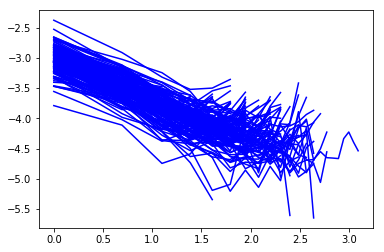

In [5]:
loops_utils.plot_scaling_values(container1.get_mean_scaling_values())

###### sum

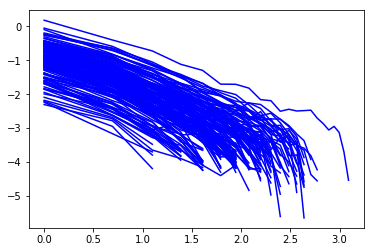

In [6]:
loops_utils.plot_scaling_values(container1.get_sum_scaling_values())

## Loops plus area after

In [7]:
max_loops_size = np.max(loops_info.y - loops_info.x)

In [8]:
max_loops_size

26

single

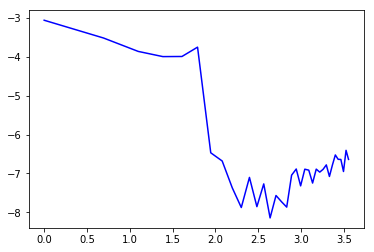

In [9]:
value = container1.calc_scaling_loop_plus_add_mean(loops_info_chr1.first_valid_index() + 10, max_loops_size)
loops_utils.plot_scaling_values([value], name='dicty_loop_single')

Chromosome 1

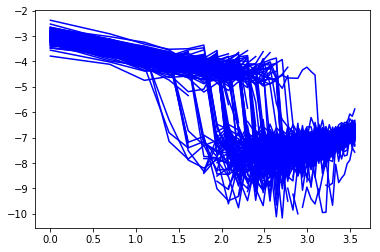

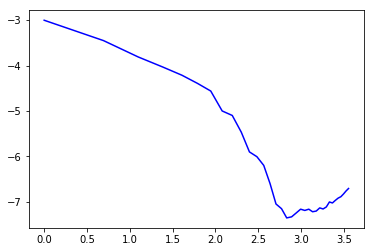

In [10]:
scaling_values1, mean1 = container1.get_mean_scaling_values_plus_area(max_loops_size)
loops_utils.plot_scaling_values(scaling_values1, name='dicty_chr1')
loops_utils.plot_scaling_values([mean1], name='dicty_loop_mean_chr1')

Chromosome 5

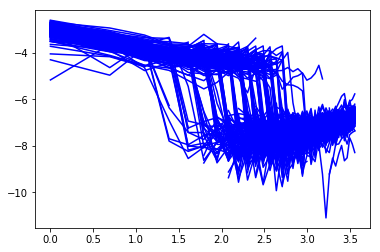

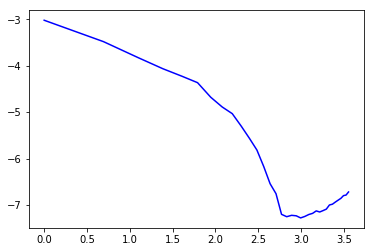

In [11]:
scaling_values5, mean5 = container5.get_mean_scaling_values_plus_area(max_loops_size)
loops_utils.plot_scaling_values(scaling_values5, name='dicty_chr5')
loops_utils.plot_scaling_values([mean5], name='dicty_loop_mean_chr5')

Chromosome 6

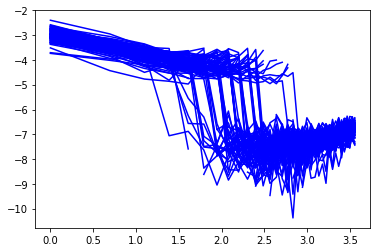

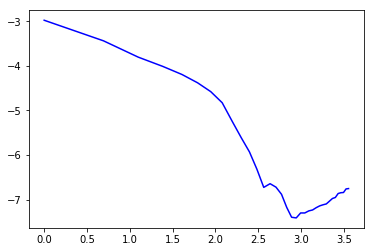

In [12]:
scaling_values6, mean6 = container6.get_mean_scaling_values_plus_area(max_loops_size)
loops_utils.plot_scaling_values(scaling_values6, name='dicty_chr6')
loops_utils.plot_scaling_values([mean6], name='dicty_loop_mean_chr6')

Overall

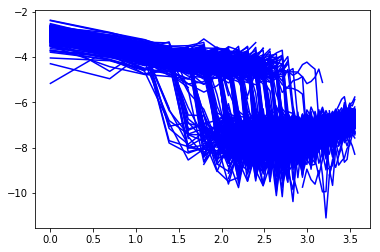

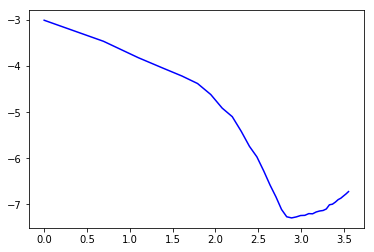

In [13]:
overall_scaling_values = scaling_values1 + scaling_values5 + scaling_values6
loops_utils.plot_scaling_values(overall_scaling_values, name='dicty_overall')
loop_mean = np.nanmean(overall_scaling_values, axis=0)
loops_utils.plot_scaling_values([loop_mean], name='dicty_loop_mean_overall')

### Interloops

###### mean

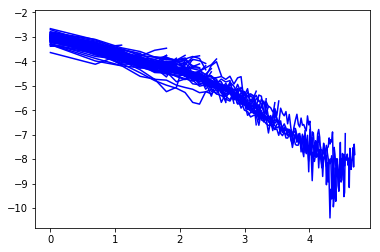

In [14]:
scaling_values = container1.get_interloops_mean_scaling_values()
loops_utils.plot_scaling_values(scaling_values)

###### sum

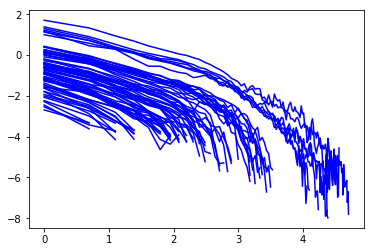

In [15]:
scaling_values = container1.get_interloops_sum_scaling_values()
loops_utils.plot_scaling_values(scaling_values)

## Plus area after

In [16]:
max_interloop1 = container1.get_max_interloop()
max_interloop5 = container5.get_max_interloop()
max_interloop6 = container6.get_max_interloop()
print(max_interloop1)
print(max_interloop5)
print(max_interloop6)

max_interloop = max(max_interloop1, max_interloop5, max_interloop6)

111.0
79.0
146.0


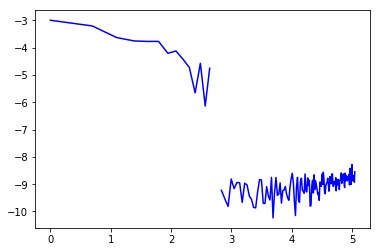

In [17]:
scaling_values = container1.calc_scaling_interloops_plus_add_mean(loops_info_chr1.iloc[8].y, loops_info_chr1.iloc[9].x, max_interloop)
loops_utils.plot_scaling_values([scaling_values], name='dicty_interloop_single')

###### Chromosome 1

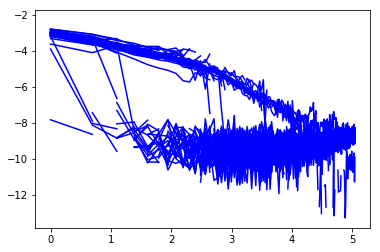

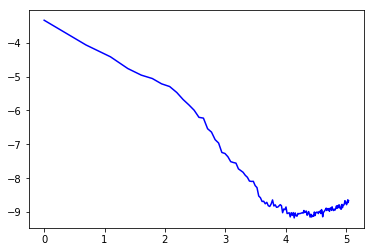

In [18]:
interloop_scaling_values1, interloops_scaling_area_mean1 =\
container1.get_interloops_mean_scaling_values_plus_area(max_interloop)
loops_utils.plot_scaling_values(interloop_scaling_values1, name='dicty_interloop_chr1')
loops_utils.plot_scaling_values([interloops_scaling_area_mean1], name='dicty_interloop_mean_chr1')

###### Chromosome 5

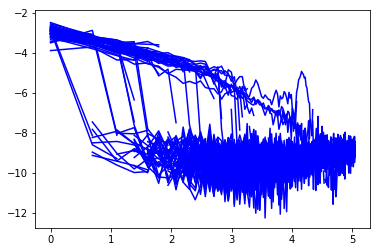

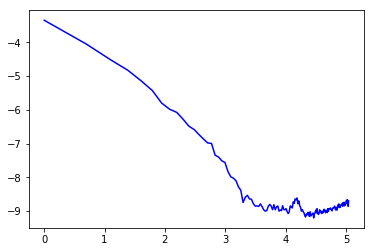

In [19]:
interloop_scaling_values5, interloops_scaling_area_mean5 =\
container5.get_interloops_mean_scaling_values_plus_area(max_interloop)
loops_utils.plot_scaling_values(interloop_scaling_values5, name='dicty_interloop_chr5')
loops_utils.plot_scaling_values([interloops_scaling_area_mean5], name='dicty_interloop_mean_chr5')

###### Chromosome 6

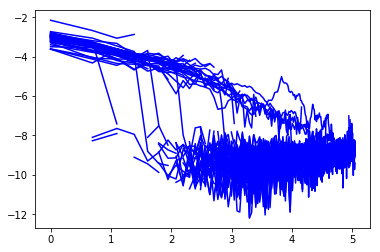

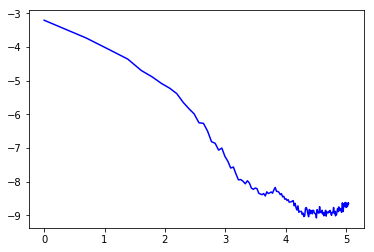

In [20]:
interloop_scaling_values6, interloops_scaling_area_mean6 =\
container6.get_interloops_mean_scaling_values_plus_area(max_interloop)
loops_utils.plot_scaling_values(interloop_scaling_values6, name='dicty_interloop_chr6')
loops_utils.plot_scaling_values([interloops_scaling_area_mean6], name='dicty_interloop_mean_chr6')

###### overall

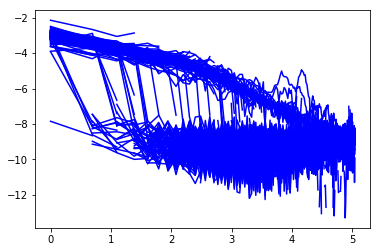

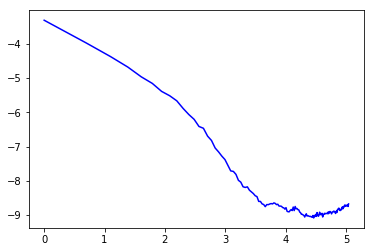

In [21]:
overall_interloop_scaling = interloop_scaling_values1 + interloop_scaling_values5 + interloop_scaling_values6
interloop_mean = np.nanmean(overall_interloop_scaling, axis=0)
loops_utils.plot_scaling_values(overall_interloop_scaling, name='dicty_interloop')
loops_utils.plot_scaling_values([interloop_mean], name='dicty_interloop_mean')

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


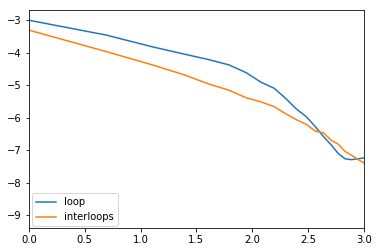

In [22]:
plt.plot(np.log(range(len(loop_mean))), np.log(loop_mean), label='loop')
plt.plot(np.log(range(len(interloop_mean))), np.log(interloop_mean), label='interloops')
plt.xlim(0, 3)
plt.legend(bbox_to_anchor=(0.01, 0.16), loc=2, borderaxespad=0.)
plt.savefig('pictures/scaling/dicty_avg_scaling.png')

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


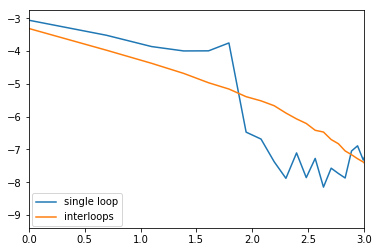

In [23]:
value = container1.calc_scaling_loop_plus_add_mean(loops_info_chr1.first_valid_index() + 10, max_loops_size)
plt.plot(np.log(range(len(value))), np.log(value), label='single loop')
plt.plot(np.log(range(len(interloop_mean))), np.log(interloop_mean), label='interloops')
plt.xlim(0, 3)
plt.legend(bbox_to_anchor=(0.01, 0.16), loc=2, borderaxespad=0.)
plt.savefig('pictures/scaling/dicty_avg_vs_one_scaling.png')

### scaling in one size

In [ ]:
loop_new_size = 100

###### mean

In [ ]:
scaling_values = []

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, x in enumerate(loops_x): 
    original_image = arr[loops_x[idx]:loops_y[idx], loops_x[idx]:loops_y[idx]]
    resized_image = loops_utils.resize_image_arr(original_image, width, height)    
    scaling = loops_utils.calc_scaling_mean(resized_image)
    scaling_values.append(scaling)
    
loops_utils.plot_scaling_values(scaling_values)

###### average

In [ ]:
fig = plt.figure()
ax = plt.axes()

sum_scaling = np.zeros(scaling_values[0].shape[0])

for scaling in scaling_values:
    sum_scaling = sum_scaling + scaling
    
mean_scaling = sum_scaling/len(scaling_values)

plt.plot(np.log(range(mean_scaling.shape[0])), np.log(mean_scaling), 'b');
plt.show()

###### sum

In [ ]:
scaling_values = []

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, x in enumerate(loops_x): 
    original_image = arr[loops_x[idx]:loops_y[idx], loops_x[idx]:loops_y[idx]]
    resized_image = loops_utils.resize_image_arr(original_image, width, height)
    scaling = loops_utils.calc_scaling_sum(resized_image)
    scaling_values.append(scaling)
    
loops_utils.plot_scaling_values(scaling_values)

###### average

In [ ]:
fig = plt.figure()
ax = plt.axes()

sum_scaling = np.zeros(scaling_values[0].shape[0])

for scaling in scaling_values:
    sum_scaling = sum_scaling + scaling
    
mean_scaling = sum_scaling/len(scaling_values)

plt.plot(np.log(range(mean_scaling.shape[0])), np.log(mean_scaling), 'b');
plt.show()

### Interloops

###### mean

In [ ]:
scaling_values = []

begin = 0

width, height = loop_new_size, loop_new_size

for idx, x in enumerate(loops_x):
    if begin < x:       
        original_image = arr[begin:x, begin:x]
        resized_image = loops_utils.resize_image_arr(original_image, width, height)
        begin = loops_y[idx]
        scaling = loops_utils.calc_scaling_mean(resized_image)
        scaling_values.append(scaling)
        
loops_utils.plot_scaling_values(scaling_values)

###### average

In [ ]:
fig = plt.figure()
ax = plt.axes()

sum_scaling = np.zeros(scaling_values[0].shape[0])

for scaling in scaling_values:
    sum_scaling = sum_scaling + scaling
    
mean_scaling = sum_scaling/len(scaling_values)

plt.plot(np.log(range(mean_scaling.shape[0])), np.log(mean_scaling), 'b');
plt.show()

###### sum

In [ ]:
scaling_values = []

begin = 0

width , height = loop_new_size, loop_new_size

for idx, x in enumerate(loops_x):
    if begin < x:
        original_image = arr[begin:x, begin:x]
        resized_image = loops_utils.resize_image_arr(original_image, width, height) 
        begin = loops_y[idx]
        scaling = loops_utils.calc_scaling_sum(resized_image)
        scaling_values.append(scaling)
        
loops_utils.plot_scaling_values(scaling_values)

###### average

In [ ]:
fig = plt.figure()
ax = plt.axes()

sum_scaling = np.zeros(scaling_values[0].shape[0])

for scaling in scaling_values:
    sum_scaling = sum_scaling + scaling
    
mean_scaling = sum_scaling/len(scaling_values)

plt.plot(np.log(range(mean_scaling.shape[0])), np.log(mean_scaling), 'b');
plt.show()